In [1]:
import tensorflow as tf 
from tensorflow.python.platform import gfile

In [2]:
interpreter = tf.lite.Interpreter(model_path="E:/eye_blink_detection/iris_landmark.tflite")
interpreter.allocate_tensors()

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 64, 64,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [4]:
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'output_eyes_contours_and_brows', 'index': 384, 'shape': array([  1, 213]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'output_iris', 'index': 385, 'shape': array([ 1, 15]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("E:/eye_blink_detection/eyelids_open_image/save.png")
img=cv2.resize(img,(64,64))
img1=img.copy()
img=img/255
img=[img]
img = np.concatenate([arr[np.newaxis] for arr in img])
#print(img.shape)
print(img.shape)
img=img.astype("float32")
#input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
tensor_index = interpreter.get_input_details()[0]['index']
input_tensor_z= tf.convert_to_tensor(img, np.float32)
interpreter.set_tensor(tensor_index, input_tensor_z)


interpreter.invoke()

 
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
landmarks=output_data
plt.imshow(img1)

(1, 64, 64, 3)
[[ 2.2668089e+01  3.1600819e+01  4.1118989e+00  2.4252527e+01
   3.2755821e+01  2.9070623e+00  2.5861870e+01  3.3223793e+01
   1.8756853e+00  2.7870913e+01  3.3584354e+01  6.4304203e-01
   3.0999975e+01  3.3393456e+01 -2.9721558e-01  3.3918194e+01
   3.2462429e+01 -4.8809105e-01  3.6648438e+01  3.1227747e+01
  -2.3731513e-01  3.8308975e+01  3.0567188e+01  3.9501965e-01
   3.9086895e+01  2.9908396e+01  3.7639251e-01  2.3528460e+01
   3.0742283e+01  2.6475134e+00  2.4541588e+01  2.9670614e+01
   1.6555779e+00  2.6154776e+01  2.8416225e+01  6.2508893e-01
   2.9300264e+01  2.7431513e+01 -4.2028058e-02  3.2429432e+01
   2.7312405e+01 -3.6969039e-01  3.5496105e+01  2.7971645e+01
  -2.8705364e-01  3.7853199e+01  2.9210896e+01  1.3715948e-01
   2.1162621e+01  3.2158047e+01  4.6666131e+00  2.3402069e+01
   3.4790901e+01  3.1162288e+00  2.5465849e+01  3.6269672e+01
   1.6076767e+00  2.8560364e+01  3.6457413e+01  1.2489887e-02
   3.1889761e+01  3.5761242e+01 -9.5267522e-01  3.52677

In [6]:
len(output_data[0])//3

71

In [7]:
print(output_data[0])

[ 2.2668089e+01  3.1600819e+01  4.1118989e+00  2.4252527e+01
  3.2755821e+01  2.9070623e+00  2.5861870e+01  3.3223793e+01
  1.8756853e+00  2.7870913e+01  3.3584354e+01  6.4304203e-01
  3.0999975e+01  3.3393456e+01 -2.9721558e-01  3.3918194e+01
  3.2462429e+01 -4.8809105e-01  3.6648438e+01  3.1227747e+01
 -2.3731513e-01  3.8308975e+01  3.0567188e+01  3.9501965e-01
  3.9086895e+01  2.9908396e+01  3.7639251e-01  2.3528460e+01
  3.0742283e+01  2.6475134e+00  2.4541588e+01  2.9670614e+01
  1.6555779e+00  2.6154776e+01  2.8416225e+01  6.2508893e-01
  2.9300264e+01  2.7431513e+01 -4.2028058e-02  3.2429432e+01
  2.7312405e+01 -3.6969039e-01  3.5496105e+01  2.7971645e+01
 -2.8705364e-01  3.7853199e+01  2.9210896e+01  1.3715948e-01
  2.1162621e+01  3.2158047e+01  4.6666131e+00  2.3402069e+01
  3.4790901e+01  3.1162288e+00  2.5465849e+01  3.6269672e+01
  1.6076767e+00  2.8560364e+01  3.6457413e+01  1.2489887e-02
  3.1889761e+01  3.5761242e+01 -9.5267522e-01  3.5267799e+01
  3.4558884e+01 -1.42122

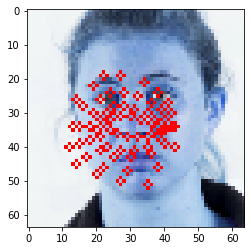

In [9]:
img1_annoted = img1.copy()
for index in range(71):
    x_index = (index-1)*3
    y_index = (index-1)*3+1
    x = int(output_data[0][x_index])
    y = int(output_data[0][y_index])
    color = (255, 0, 0)
    img1_annoted = cv2.circle(img1_annoted,(x,y),1, color, 1)
    plt.imshow(img1_annoted)